In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [4]:

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from spacy.lang.en.stop_words import STOP_WORDS

##### Put the hyparameters at the top like this to make it easier to change and edit.

In [5]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

#### First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [6]:
articles = []
labels = []

with open("data/bbc-news.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOP_WORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [7]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

#### There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [8]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [10]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 's': 2,
 'said': 3,
 'mr': 4,
 'year': 5,
 'people': 6,
 'new': 7,
 't': 8,
 'time': 9,
 'government': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [11]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [12]:
print(train_sequences[10])

[2354, 1, 184, 4925, 15, 575, 522, 184, 4925, 1, 1, 1578, 1, 1, 2354, 15, 502, 1, 1, 109, 233, 1, 109, 233, 721, 747, 594, 2230, 1, 1061, 1610, 1, 1637, 4926, 1, 1, 1, 1, 1, 4668, 1, 1, 91, 4444, 1, 3, 2795, 1420, 4669, 1, 36, 2092, 3886, 26, 15, 3718, 1, 1, 1, 1, 2, 480, 1, 1, 1, 760, 565, 2, 2288, 295, 4670, 1, 15, 1, 713, 2289, 1, 4229, 107, 1, 2, 3583, 612, 3450, 1, 15, 1, 356, 747, 594, 1, 64, 567, 1, 184, 4925, 1, 534, 1, 1610, 939, 1, 4927, 732, 1782, 87, 1, 1, 1, 2, 2895, 15, 1, 233, 1, 2, 1522, 4928, 480, 433, 1, 1360, 4671, 704, 1239, 1, 1778, 575, 273, 1, 417, 502, 255, 1421, 15, 418, 1, 2, 1, 1582, 1, 722, 1, 2988, 1, 1282, 1, 2354, 502, 15, 2892, 4665, 1, 1, 1, 1, 1, 775, 24, 1743, 606, 251, 17, 899, 1, 806, 15, 307, 15, 255, 1421, 1260, 318, 14, 42, 807, 1013, 4230, 205]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on

In [13]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [14]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

387
200
178
200
179
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [15]:
print(train_sequences[10])

[2354, 1, 184, 4925, 15, 575, 522, 184, 4925, 1, 1, 1578, 1, 1, 2354, 15, 502, 1, 1, 109, 233, 1, 109, 233, 721, 747, 594, 2230, 1, 1061, 1610, 1, 1637, 4926, 1, 1, 1, 1, 1, 4668, 1, 1, 91, 4444, 1, 3, 2795, 1420, 4669, 1, 36, 2092, 3886, 26, 15, 3718, 1, 1, 1, 1, 2, 480, 1, 1, 1, 760, 565, 2, 2288, 295, 4670, 1, 15, 1, 713, 2289, 1, 4229, 107, 1, 2, 3583, 612, 3450, 1, 15, 1, 356, 747, 594, 1, 64, 567, 1, 184, 4925, 1, 534, 1, 1610, 939, 1, 4927, 732, 1782, 87, 1, 1, 1, 2, 2895, 15, 1, 233, 1, 2, 1522, 4928, 480, 433, 1, 1360, 4671, 704, 1239, 1, 1778, 575, 273, 1, 417, 502, 255, 1421, 15, 418, 1, 2, 1, 1582, 1, 722, 1, 2988, 1, 1282, 1, 2354, 502, 15, 2892, 4665, 1, 1, 1, 1, 1, 775, 24, 1743, 606, 251, 17, 899, 1, 806, 15, 307, 15, 255, 1421, 1260, 318, 14, 42, 807, 1013, 4230, 205]


In [16]:
print(train_padded[10])

[2354    1  184 4925   15  575  522  184 4925    1    1 1578    1    1
 2354   15  502    1    1  109  233    1  109  233  721  747  594 2230
    1 1061 1610    1 1637 4926    1    1    1    1    1 4668    1    1
   91 4444    1    3 2795 1420 4669    1   36 2092 3886   26   15 3718
    1    1    1    1    2  480    1    1    1  760  565    2 2288  295
 4670    1   15    1  713 2289    1 4229  107    1    2 3583  612 3450
    1   15    1  356  747  594    1   64  567    1  184 4925    1  534
    1 1610  939    1 4927  732 1782   87    1    1    1    2 2895   15
    1  233    1    2 1522 4928  480  433    1 1360 4671  704 1239    1
 1778  575  273    1  417  502  255 1421   15  418    1    2    1 1582
    1  722    1 2988    1 1282    1 2354  502   15 2892 4665    1    1
    1    1    1  775   24 1743  606  251   17  899    1  806   15  307
   15  255 1421 1260  318   14   42  807 1013 4230  205    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [17]:
print(train_sequences[0])

[65, 124, 1058, 1023, 33, 899, 682, 1, 63, 1221, 4216, 98, 138, 3573, 1130, 1111, 1490, 27, 6, 817, 65, 1, 286, 14, 9, 99, 3184, 1131, 2344, 506, 392, 1294, 3298, 3440, 1576, 7, 843, 659, 769, 1, 533, 1491, 1024, 337, 1860, 1023, 33, 474, 1316, 1931, 1538, 103, 207, 83, 2277, 4909, 900, 519, 3882, 3705, 843, 2484, 98, 293, 138, 3573, 1, 1, 24, 1492, 2789, 19, 2, 4653, 12, 2, 1222, 105, 358, 6, 112, 1339, 49, 4432, 376, 4910, 65, 1024, 54, 1, 58, 1932, 1, 65, 926, 479, 63, 1221, 65, 1885, 100, 106, 362, 2790, 118, 1150, 63, 1221, 4654, 6, 376, 4910, 3076, 2414, 1, 372, 1043, 1, 1340, 1177, 1821, 1, 692, 474, 1316, 1931, 103, 1988, 342, 770, 1886, 1515, 1633, 2791, 1, 1, 2345, 2546, 58, 660, 1089, 1112, 118, 650, 526, 1, 93, 19, 1222, 1606, 373, 85, 14, 9, 12, 3077, 1, 23, 1400, 2, 1, 16, 23, 61, 287, 2278, 23, 407, 213, 1886, 1276, 2639, 1, 253, 660, 1090, 12, 2792, 1633, 1, 249, 1, 991, 337, 1933, 372, 1933, 3, 1277, 1, 1633, 2086, 47, 1, 1, 1634, 207, 1577, 2980, 1091, 337, 26, 802, 2

In [18]:
print(train_padded[0])

[  65  124 1058 1023   33  899  682    1   63 1221 4216   98  138 3573
 1130 1111 1490   27    6  817   65    1  286   14    9   99 3184 1131
 2344  506  392 1294 3298 3440 1576    7  843  659  769    1  533 1491
 1024  337 1860 1023   33  474 1316 1931 1538  103  207   83 2277 4909
  900  519 3882 3705  843 2484   98  293  138 3573    1    1   24 1492
 2789   19    2 4653   12    2 1222  105  358    6  112 1339   49 4432
  376 4910   65 1024   54    1   58 1932    1   65  926  479   63 1221
   65 1885  100  106  362 2790  118 1150   63 1221 4654    6  376 4910
 3076 2414    1  372 1043    1 1340 1177 1821    1  692  474 1316 1931
  103 1988  342  770 1886 1515 1633 2791    1    1 2345 2546   58  660
 1089 1112  118  650  526    1   93   19 1222 1606  373   85   14    9
   12 3077    1   23 1400    2    1   16   23   61  287 2278   23  407
  213 1886 1276 2639    1  253  660 1090   12 2792 1633    1  249    1
  991  337 1933  372 1933    3 1277    1 1633 2086   47    1    1 1634
  207 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [19]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [20]:
print(set(labels))

{'sport', 'entertainment', 'business', 'tech', 'politics'}


In [21]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [22]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [23]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility legacy <OOV> going ideas alive added film drew <OOV> <OOV> <OOV> <OOV> s trial <OOV> <OOV> <OOV> east germany s secret police discovery <OOV> film <OOV> worked closely <OOV> relatives including <OOV> s sisters ensure historical <OOV> film <OOV> members white rose <OOV> group started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> s regime film <OOV> days <OOV> s arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance german films <OOV> prize festival south african film version <OOV> s <OOV> opera <OOV> shot <OOV> town <OOV> language <OOV> berlin festival film entitled u <OOV> <OOV> <OOV> <OOV> <OOV> story set 

## Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

## Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

## This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [24]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
num_epochs = 15
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, \
    validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/15
56/56 - 8s - loss: 1.5878 - accuracy: 0.3096 - val_loss: 1.2969 - val_accuracy: 0.4090
Epoch 2/15
56/56 - 5s - loss: 0.7449 - accuracy: 0.7393 - val_loss: 0.5297 - val_accuracy: 0.8180
Epoch 3/15
56/56 - 5s - loss: 0.2783 - accuracy: 0.9124 - val_loss: 0.4048 - val_accuracy: 0.8517
Epoch 4/15
56/56 - 5s - loss: 0.1491 - accuracy: 0.9472 - val_loss: 0.3151 - val_accuracy: 0.8899
Epoch 5/15
56/56 - 5s - loss: 0.0437 - accuracy: 0.9927 - val_loss: 0.4069 - val_accuracy: 0.8876
Epoch 6/15
56/56 - 5s - loss: 0.0352 - accuracy: 0.9904 - val_loss: 0.3108 - val_accuracy: 0.9191
Epoch 7/15
56/56 - 6s - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.3301 - val_accuracy: 0.9056
Epoch 8/15
56/56 - 6s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3176 - val_accuracy: 0.9236
Epoch 9/15
56/56 - 6s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3334 - val_accuracy: 0.9236
Epoch 10/15
56/56 - 6s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.3330 - val_accuracy: 0.9191
Epoch 11/15
56/56 -

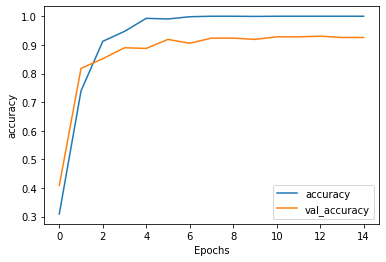

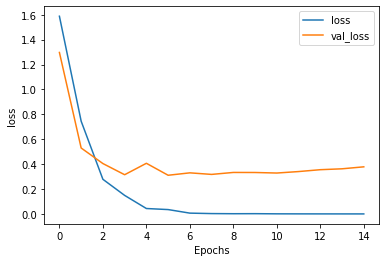

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [30]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred, labels[np.argmax(pred)])

[[1.0736343e-05 9.9201864e-01 3.0538886e-05 1.7210672e-05 6.4641476e-06
  7.9163443e-03]] bussiness


In [31]:
np.argmax(pred)

1

In [32]:
labels[np.argmax(pred)]

'bussiness'

## Save model

In [35]:
import pickle
# Save tokenizer
pickle.dump(tokenizer, open("model/news_classification_model_LSTM_tokenizer", "wb"))
# Save the model
model.save('model/news_classification_model_LSTM')

INFO:tensorflow:Assets written to: model/news_classification_model_LSTM\assets


INFO:tensorflow:Assets written to: model/news_classification_model_LSTM\assets


## Load saved model and predict

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from spacy.lang.en.stop_words import STOP_WORDS
import pickle

new_tokenizer = open("model/news_classification_model_LSTM_tokenizer", "rb")
tokenizer = pickle.load(new_tokenizer)

new_model = tf.keras.models.load_model('model/news_classification_model_LSTM')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [5]:
max_length = 200

txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = new_model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred)

[[1.0736343e-05 9.9201864e-01 3.0538886e-05 1.7210672e-05 6.4641476e-06
  7.9163443e-03]]


In [6]:
labels[np.argmax(pred)]

'bussiness'